# 💻 Class Exercise: Images as Data

**Time:** ~50 minutes  
> This exercise helps you see images as matrices, understand RGB channels, try simple resizing, and apply tiny edge filters.



## 0) Load a Built-in Sample Image
- We will use **scikit-image's built-in astronaut image** so that everyone has the same starting point.
- This avoids the need to upload/download files.


RGB shape: (512, 512, 3) uint8
GRAY shape: (512, 512) uint8


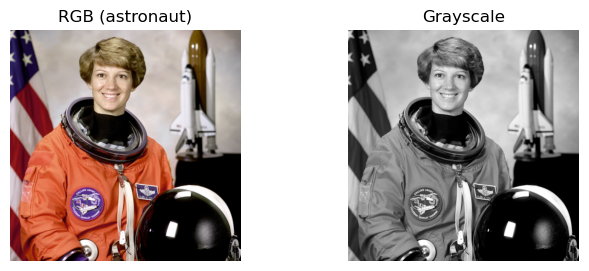

In [1]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

# Load a built-in sample image (astronaut)
rgb = data.astronaut()  # shape (512, 512, 3), uint8
gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

print('RGB shape:', rgb.shape, rgb.dtype)
print('GRAY shape:', gray.shape, gray.dtype)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.imshow(rgb); plt.title('RGB (astronaut)'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.show()

## 1) Matrix View
Print a small image patch for both **RGB** and **GRAY** images.  

RGB 10x10x3 patch:
 [[[154 147 151]
  [109 103 124]
  [ 63  58 102]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]]]

GRAY 10x10 patch:
 [[149 107  64  57  79 100 122 135 142 135]
 [172 142 114 108 128 144 159 165 167 152]
 [195 178 165 157 165 181 185 186 176 156]
 [214 208 198 193 196 198 201 194 175 143]
 [225 221 216 211 214 207 207 188 162 125]
 [230 229 224 220 218 211 197 175 145 103]
 [230 231 227 224 216 206 185 161 123  77]
 [227 228 225 219 212 201 183 149 104  55]
 [224 224 222 217 211 200 179 145  98  48]
 [222 223 219 213 210 200 178 152 111  68]]


(-0.5, 9.5, 9.5, -0.5)

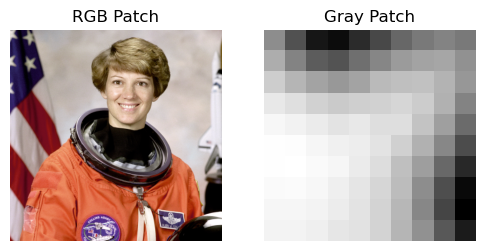

In [7]:
# 10x10 patches using slicing
print('RGB 10x10x3 patch:\n', rgb[:3, :3, :])
print('\nGRAY 10x10 patch:\n', gray[:10, :10])

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(rgb[:399,:399,:])
plt.title('RGB Patch')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray[:10,:10], cmap='gray')
plt.title('Gray Patch')
plt.axis('off')



## 2) Channel Edit
Zero out the **G (Green)** channel and visualize.  
Question: What color tint appears? Why?

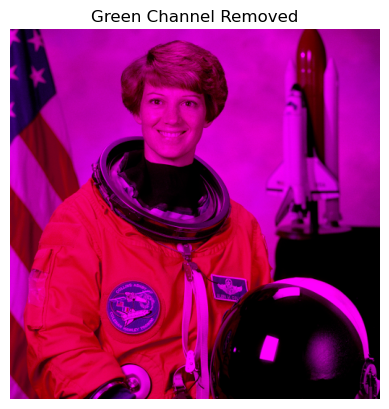

In [3]:
img_noG = rgb.copy()
img_noG[:,:,1] = 0  # remove green channel
plt.imshow(img_noG)
plt.title('Green Channel Removed')
plt.axis('off')
plt.show()

## 3) Resize & Compare Resolution
Resize the **same RGB image** into **32×32** and **128×128**, display side-by-side with the original.  
Briefly explain: Which one looks sharper? Why?

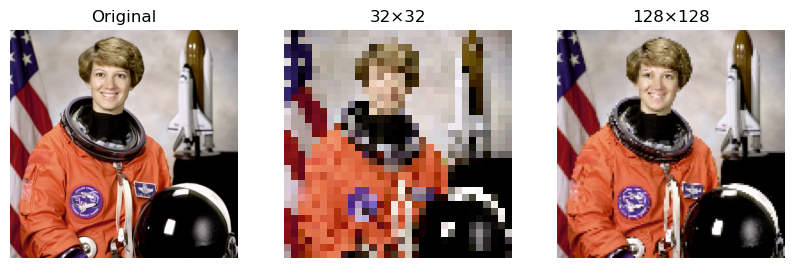

In [4]:
import cv2

# Resize with OpenCV (cv2.resize expects (width, height))
img_32 = cv2.resize(rgb, (32, 32), interpolation=cv2.INTER_NEAREST)
img_128 = cv2.resize(rgb, (128, 128), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img_32); plt.title('32×32'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(img_128); plt.title('128×128'); plt.axis('off')
plt.show()

In [ ]:
# 其他的插值方法
# 所有可用的插值方法
methods = {
    'NEAREST': cv2.INTER_NEAREST,      # 最近邻插值
    'LINEAR': cv2.INTER_LINEAR,        # 双线性插值（默认）
    'CUBIC': cv2.INTER_CUBIC,          # 双三次插值
    'AREA': cv2.INTER_AREA,            # 区域插值（适合缩小）
    'LANCZOS4': cv2.INTER_LANCZOS4,    # Lanczos插值
    'LINEAR_EXACT': cv2.INTER_LINEAR_EXACT  # 精确线性插值
}

## 4) Edge Detector (3×3 kernels)
Try a **horizontal Sobel** and compare with a **Laplacian** filter on the **grayscale** image.

**We will provide more details about this part in our future course. Now, just play the code!**

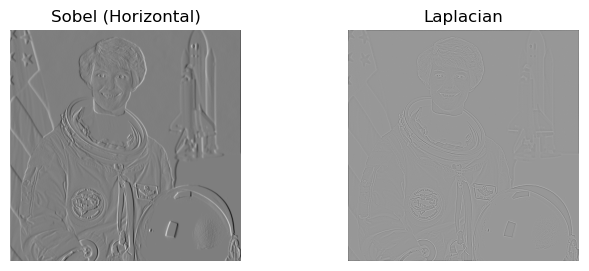

In [5]:
def conv2d_same(img2d, kernel3x3):
    """Simple 2D convolution with zero-padding (same size). img2d: uint8/float; kernel: 3x3 float."""
    h, w = img2d.shape
    out = np.zeros((h, w), dtype=np.float32)
    pad = np.pad(img2d.astype(np.float32), ((1,1),(1,1)), mode='constant')
    k = kernel3x3.astype(np.float32)
    for i in range(h):
        for j in range(w):
            region = pad[i:i+3, j:j+3]
            out[i,j] = np.sum(region * k)
    return out

# 3x3 kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

laplacian = np.array([[0,  1, 0],
                      [1, -4, 1],
                      [0,  1, 0]], dtype=np.float32)

edge_sobel = conv2d_same(gray, sobel_x)
edge_lap   = conv2d_same(gray, laplacian)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1); plt.imshow(edge_sobel, cmap='gray'); plt.title('Sobel (Horizontal)'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edge_lap, cmap='gray'); plt.title('Laplacian'); plt.axis('off')
plt.show()